In [15]:
#comparison of different featurizations of substitued benzenes

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from deepchem.feat import MordredDescriptors as md_desc
from deepchem.feat import RDKitDescriptors as rdkit_desc
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import AllChem


rdkit_featurizer = rdkit_desc()
mordr_featurizer = md_desc()

In [17]:
# list of SMILES choosen
SMI = ["c1ccccc1N", "c1ccccc1OC", "c1ccccc1", "c1ccccc1Cl", "c1ccccc1[N+](=O)[O-]", "c1ccccc1C#N"]
names = ["NH$_2$", "OCH$_3$", "H", "Cl", "NO$_2$", "CN"]
mols = [Chem.MolFromSmiles(smi) for smi in SMI]

In [26]:
# Compare different descriptors|

"### WARNING ###"
"hammett descriptors are manually implemented therefore if SMI is modified"
"hammett has to be modified too!!!"

# MorganFPs
FPs = [AllChem.GetMorganFingerprint(mol, radius=2) for mol in mols]
# Hammet
hammett = [-0.662, -0.268, 0, 0.227, 0.778, 1]
# RDKit Descriptors
RDKit = rdkit_featurizer.featurize(SMI)
# Mordred Descriptors
Mordred = mordr_featurizer.featurize(SMI)


# build similarity matrixes for 4 descriptors
sim_fp = np.zeros((len(SMI), len(SMI)))
sim_h = np.zeros((len(SMI), len(SMI)))
sim_rdkit = np.zeros((len(SMI), len(SMI)))
sim_mordr = np.zeros((len(SMI), len(SMI)))

for i in range(len(FPs)):
    for j in range(len(FPs)):
        sim_fp[i,j] = DataStructs.TanimotoSimilarity(FPs[i],FPs[j])
        sim_h[i,j] = 1 - np.abs(hammett[i]-hammett[j])/2
        sim_rdkit[i,j] = 1 - 2*np.sum(np.abs(RDKit[i]-RDKit[j]))/(np.sum(np.abs(RDKit[i]+RDKit[j])))
        sim_mordr[i,j] = 1 - 2*np.sum(np.abs(Mordred[i]-Mordred[j]))/np.sum(np.abs(Mordred[i]+Mordred[j]))

mask = np.zeros_like(sim_fp)
mask[np.triu_indices_from(sim_fp, 1)] = True

df_cm_fp = pd.DataFrame(sim_fp, index = names,
                  columns = names)
df_cm_h = pd.DataFrame(sim_h, index = names,
                  columns = names)
df_cm_rdkit = pd.DataFrame(sim_rdkit, index = names,
                  columns = names)
df_cm_mordr = pd.DataFrame(sim_mordr, index = names,
                  columns = names)

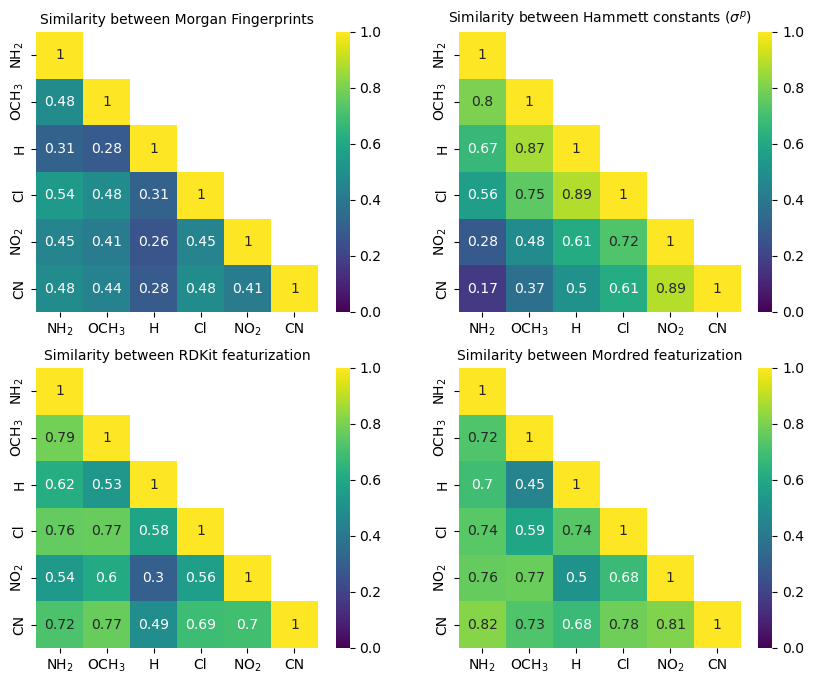

In [29]:
# plot the results
fig, ax = plt.subplots(2,2,figsize=(10,8))



#FP
sns.heatmap(data=df_cm_fp, annot=True, ax=ax[0,0],
                mask=mask,
                cmap='viridis',
                annot_kws={"size": 10},
                cbar=True, vmin=0, vmax=1)

ax[0,0].set_title("Similarity between Morgan Fingerprints", fontsize=10)


#Hammett
sns.heatmap(df_cm_h, annot=True, ax=ax[0,1], 
            mask=mask,
                cmap='viridis',
                annot_kws={"size": 10},
                cbar=True, vmin=0, vmax=1)

ax[0,1].set_title("Similarity between Hammett constants ($\sigma^{p}$)", fontsize=10)

#RDKit
sns.heatmap(df_cm_rdkit, annot=True, ax=ax[1,0], 
            mask=mask,
                cmap='viridis',
                annot_kws={"size": 10},
                cbar=True, vmin=0, vmax=1)

ax[1,0].set_title("Similarity between RDKit featurization", fontsize=10)

#Mordred
ax[1,1].set_title("Similarity between Mordred featurization", fontsize=10)
sns.heatmap(data=df_cm_mordr, annot=True, ax=ax[1,1], 
            mask=mask,
                cmap='viridis',
                annot_kws={"size": 10},
                cbar=True, vmin=0, vmax=1)

fig.savefig("figures/subfigure_13_similarities.png", dpi=300, bbox_inches="tight")